# Working with Unlabeled Data – Clustering Analysis

## K-means clustering using scikit-learn

In [1]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [2]:
X

array([[-11.42334823,   0.47788255],
       [ -8.4742794 ,  -0.61791301],
       [  0.12182449,   4.3428326 ],
       ...,
       [ -0.94345255,   3.63506264],
       [  5.84657926,   4.25089925],
       [ -8.93111989,  -1.27916904]])

In [3]:
y

array([1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0,

In [4]:
import numpy as np
np.unique(y)

array([0, 1, 2])

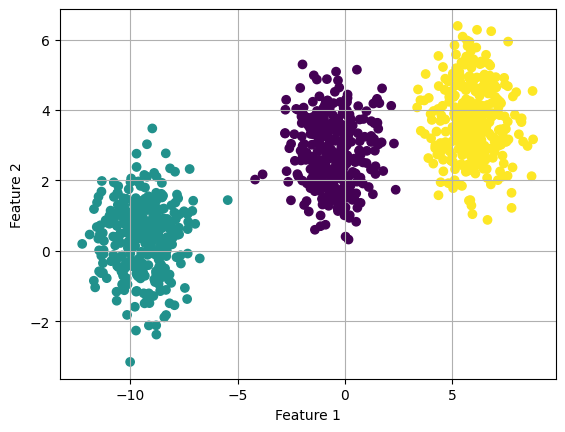

In [5]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.show()

In [6]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3, 
            init='random',  
            max_iter=300)

In [7]:
y_km = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


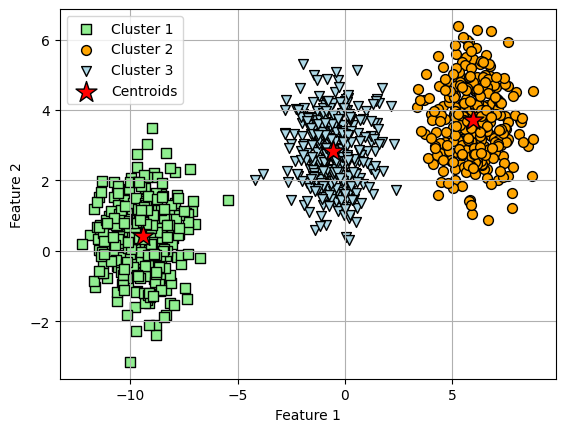

In [8]:
#generates a scatter plot to visualize clusters and their centroids resulting from a K-Means clustering algorithm
#Selects all points from X that belong to the first cluster (y_km == 0), using the first and second features as coordinates.
plt.scatter(X[y_km == 0, 0],  
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')

plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')


plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend(scatterpoints=1)
plt.grid()

#plt.savefig('figures/10_02.png', dpi=300)
plt.show()

In [9]:
#Distortion/Inertia is a key metric in evaluating the quality of a K-Means clustering model.
#It is the sum of squared distances of samples to their closest cluster center. It is a measure of how well the data points are clustered,
#with lower values indicating better clustering.

print(f'Distortion: {km.inertia_:.2f}')

Distortion: 2074.81


## Using the elbow method to find the optimal number of clusters 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

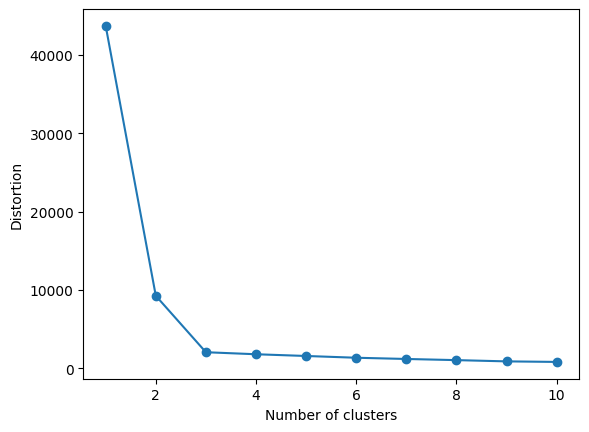

In [10]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='random')
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

In [11]:
distortions

[43690.62784264373,
 9274.10107743673,
 2074.812790992944,
 1816.5200560389155,
 1595.3012198754227,
 1370.8482149566646,
 1214.2371905180796,
 1066.9294948267745,
 907.9808973028606,
 837.8651654337206]

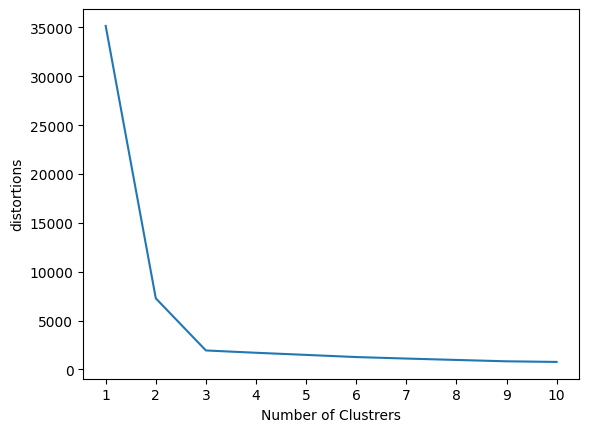

In [21]:
## plot elbow curve
plt.plot(range(1,11),distortions)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("distortions")
plt.show()

## Quantifying the quality of clustering  via silhouette plots

The silhouette plot helps assess how well the clusters are separated. Each bar represents the silhouette score for each data point in a cluster. A higher average score means better-defined clusters. The red dashed line shows the average silhouette score across all points.

In [15]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples


km = KMeans(n_clusters=4, 
            init='random', 
            max_iter=300)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

#Computes the silhouette scores for each sample using the Euclidean distance metric.
#The silhouette score measures how similar a point is to its own cluster compared to other clusters.

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') 
#print(silhouette_vals)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


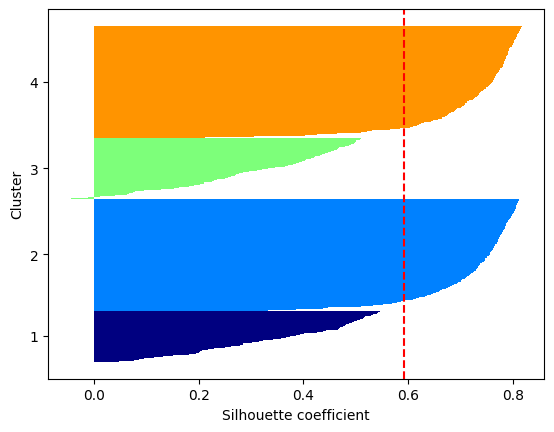

In [13]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c] #Selects the silhouette scores corresponding to the current cluster c.
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


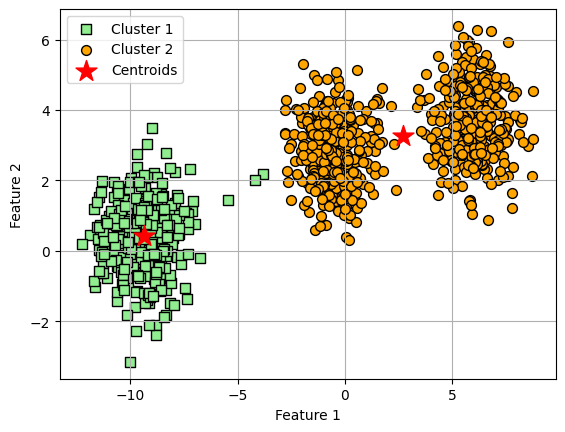

In [17]:
km = KMeans(n_clusters=2,
            init='random',
            max_iter=300)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.grid()
plt.show()

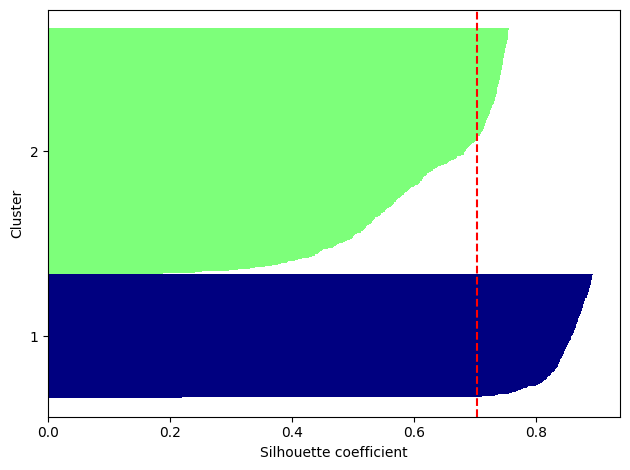

In [18]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('figures/10_06.png', dpi=300)
plt.show()

# Organizing clusters as a hierarchical tree

## Grouping clusters in bottom-up fashion

In [19]:
import pandas as pd
import numpy as np


np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

X = np.random.random_sample([5, 3])*10  #Generates a 5x3 array of random numbers between 0 and 1, then scales them by multiplying by 10.
X

array([[6.96469186, 2.86139335, 2.26851454],
       [5.51314769, 7.1946897 , 4.2310646 ],
       [9.80764198, 6.84829739, 4.80931901],
       [3.92117518, 3.43178016, 7.29049707],
       [4.38572245, 0.59677897, 3.98044255]])

In [21]:
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing hierarchical clustering on a distance matrix

In [22]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


We can either pass a condensed distance matrix (upper triangular) from the `pdist` function, or we can pass the "original" data array and define the `metric='euclidean'` argument in `linkage`. However, we should not pass the squareform distance matrix, which would yield different distance values although the overall clustering could be the same.

In [23]:
# 2. correct approach: Condensed distance matrix
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [24]:
# 3. correct approach: Input matrix

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


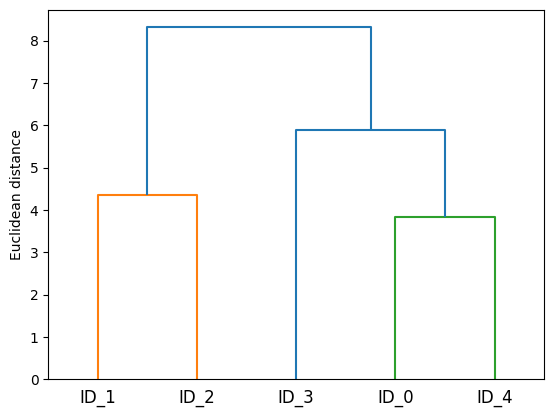

In [25]:
from scipy.cluster.hierarchy import dendrogram



row_dendr = dendrogram(row_clusters, 
                       labels=labels,

                       )

plt.ylabel('Euclidean distance')
#plt.savefig('figures/10_11.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

## Applying agglomerative clustering via scikit-learn

In agglomerative clustering, each data point starts as its own cluster, and clusters are iteratively merged based on a linkage criterion.

In [26]:
from sklearn.cluster import AgglomerativeClustering



ac = AgglomerativeClustering(n_clusters=3,
                                 metric="euclidean",
                                 linkage="complete"
                                )


labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')

Cluster labels: [1 0 0 2 1]


# clustring on iris dataset

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [28]:
## Import IRIS dataset
iris=datasets.load_iris()

In [29]:
iris_data=pd.DataFrame(iris.data)

In [30]:
iris_data.columns=iris.feature_names

In [31]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
X_scaled=scaler.fit_transform(iris_data)

Text(0, 0.5, 'Eucledian Distance')

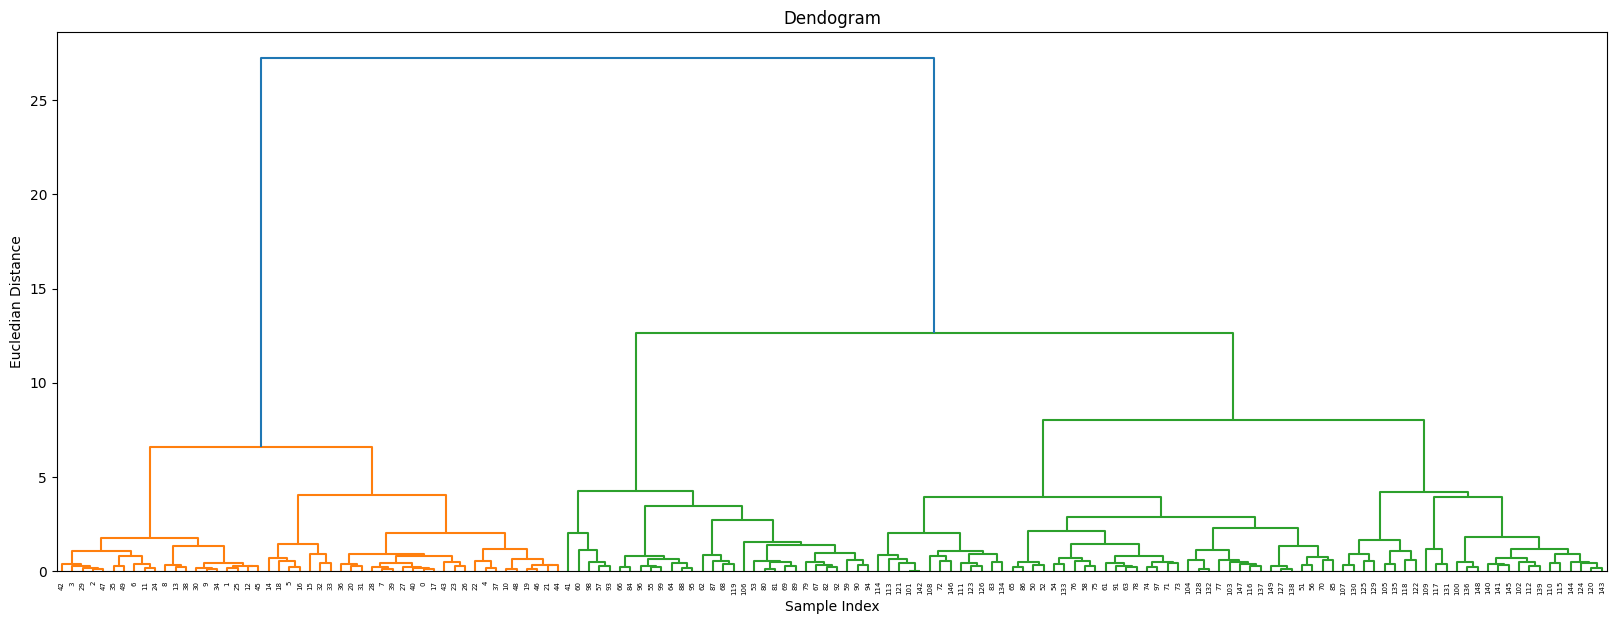

In [34]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
#Ward's method: A variance-minimizing approach that minimizes the total within-cluster variance. 
#It is effective in creating more balanced clusters.

sc.dendrogram(sc.linkage(X_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [35]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
cluster.fit(X_scaled)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [37]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

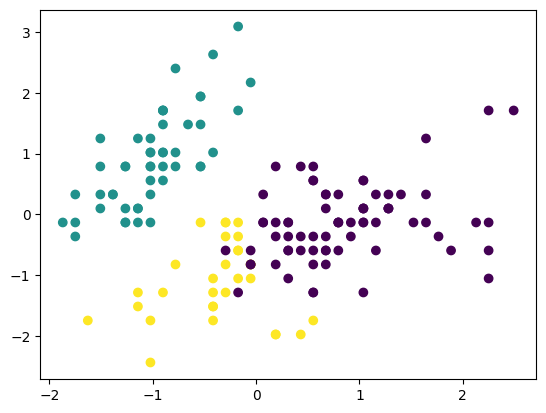

In [38]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=cluster.labels_)